<a href="https://colab.research.google.com/github/arghasree/RL/blob/main/MC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import matplotlib.pyplot as plt

Note in the following lines of code, I will sample x points. The more points I sample, the more area of the square/circle is covered, and the more accurate my calculations are.

In [ ]:
n_points = 200000
points = torch.rand((n_points, 2))  # size = (n_points, 2) These points are made in 2D for visualization purposes
points = points * 2 -1 # making the be in range (0,1) to (-1,1)

The circle is of radius 1. \
So distance of point (x,y) from the origin (0,0) is:
$$r = \sqrt{(x-0)^2+(y-0)^2}$$

In the following lines of code, I count the number of points in the circle. \
Note that I already have the total points in the square.
I assume that the circle has radius 0.5. You can also do it with radius=1, but that would change the following calculations.

In [ ]:
n_point_circle = 0
points_circle = []
for point in points:
  r = torch.sqrt(point[0] ** 2 + point[1] ** 2)  # equation above
  if r <= 0.5:  # if the distance between point and origin (centre of the circle) is less than the radius
    points_circle.append(point) # sampling points based on above equation.
    n_point_circle += 1  # number of points inside the circle

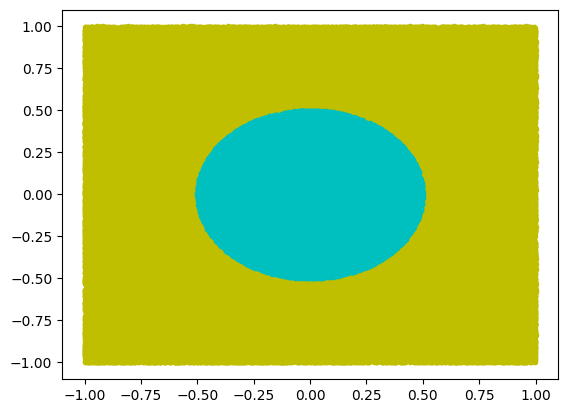

In [ ]:
points_circle = torch.stack(points_circle)
plt.plot(points[:, 0].numpy(), points[:, 1].numpy(), 'y.') # all points
plt.plot(points_circle[:, 0].numpy(), points_circle[:, 1].numpy(), 'c.') # points that belong to the circle

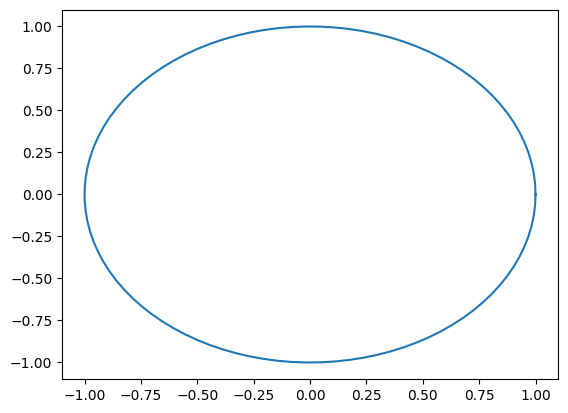

In [ ]:
i = torch.linspace(0, 2 * math.pi, steps=100)  # Creates a one-dimensional tensor of size steps whose values are evenly spaced from start, 0 to end, 2*pi
plt.plot(torch.cos(i).numpy(), torch.sin(i).numpy())
# plt.axes().set_aspect('equal')
plt.show()

### How to estimate Π?

$$\frac{A_{sq}}{A_{cir}} = \frac{a^2}{\pi r^2} = \frac{2^2}{\pi (0.5)^2} = \frac{16}{\pi}$$

Say the number of points in the square in S and the number of points in the circle is C, then the areas can be estimated by the number of points.

$$\frac{S}{C} = \frac{16}{\pi}$$
$$\pi \simeq  16\frac{C}{S}$$

In [ ]:
pi_estimated = 16 * (n_point_circle / n_points)
print('Estimated value of pi is:', pi_estimated)

Estimated value of pi is: 3.15504


On running above lines of code with diffeent number of points, the estimate of Π becomes more and more accurate.